In [13]:
!pip install pulp


In [14]:
import pulp


In [15]:
# Warehouses and Stores
warehouses = ["W1","W2","W3"]
stores = ["S1","S2","S3","S4"]

# Supply for each warehouse
supply = {"W1":40, "W2":60, "W3":50}

# Demand for each store
demand = {"S1":30, "S2":50, "S3":35, "S4":25}

# Shipping costs per unit
costs = {
    ("W1","S1"):4, ("W1","S2"):6, ("W1","S3"):9, ("W1","S4"):5,
    ("W2","S1"):5, ("W2","S2"):4, ("W2","S3"):7, ("W2","S4"):6,
    ("W3","S1"):6, ("W3","S2"):3, ("W3","S3"):4, ("W3","S4"):8
}


In [16]:
# Create a minimization problem
model = pulp.LpProblem("Supply_Chain_Optimization", pulp.LpMinimize)


In [17]:
# Units shipped from warehouse to store (integer)
x = pulp.LpVariable.dicts("Ship", (warehouses, stores), lowBound=0, cat='Integer')


In [18]:
# Minimize total shipping cost
model += pulp.lpSum(costs[(w,s)] * x[w][s] for w in warehouses for s in stores), "Total_Cost"


In [19]:
# Supply constraints (cannot ship more than available)
for w in warehouses:
    model += pulp.lpSum(x[w][s] for s in stores) <= supply[w], f"Supply_{w}"

# Demand constraints (each store must get required units)
for s in stores:
    model += pulp.lpSum(x[w][s] for w in warehouses) == demand[s], f"Demand_{s}"


In [20]:
model.solve()


1

In [21]:
print("Status:", pulp.LpStatus[model.status])
for w in warehouses:
    for s in stores:
        if x[w][s].value() > 0:
            print(f"Ship {x[w][s].value()} units from {w} to {s}")
print("Total Transportation Cost =", pulp.value(model.objective))


Status: Optimal
Ship 30.0 units from W1 to S1
Ship 10.0 units from W1 to S4
Ship 35.0 units from W2 to S2
Ship 15.0 units from W2 to S4
Ship 15.0 units from W3 to S2
Ship 35.0 units from W3 to S3
Total Transportation Cost = 585.0


In [22]:
import matplotlib.pyplot as plt
import pandas as pd


In [23]:
# Create a dictionary of the shipments from the solution
shipment_data = []
for w in warehouses:
    for s in stores:
        qty = x[w][s].value()
        if qty > 0:
            shipment_data.append([w, s, qty])

# Convert to DataFrame
df = pd.DataFrame(shipment_data, columns=['Warehouse', 'Store', 'Quantity'])
df


,Warehouse,Store,Quantity
0,W1,S1,30.0
1,W1,S4,10.0
2,W2,S2,35.0
3,W2,S4,15.0
4,W3,S2,15.0
5,W3,S3,35.0


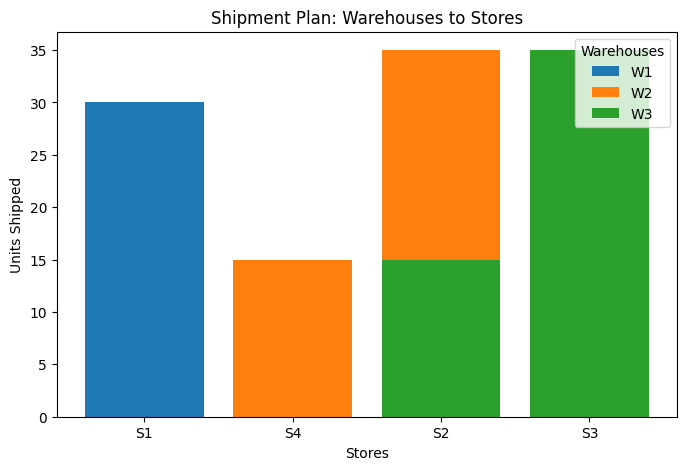

In [24]:
# Plot a grouped bar chart for visualization
fig, ax = plt.subplots(figsize=(8,5))

for w in warehouses:
    df_w = df[df['Warehouse']==w]
    ax.bar(df_w['Store'], df_w['Quantity'], label=w)

ax.set_title('Shipment Plan: Warehouses to Stores')
ax.set_xlabel('Stores')
ax.set_ylabel('Units Shipped')
ax.legend(title='Warehouses')
plt.show()


# Supply Chain Optimization Problem

A company has 3 warehouses and 4 retail stores. Each warehouse has limited supply, and each store has specific demand.  
Shipping from a warehouse to a store has a cost per unit.  

**Objective:** Minimize total transportation cost while satisfying all store demands and not exceeding warehouse supplies.


## Mathematical Model

- **Decision Variables:**  
  \( x_{ij} \) = units shipped from warehouse \( i \) to store \( j \)

- **Objective Function (Minimize Cost):**  
\[
\text{Minimize } Z = \sum_{i}\sum_{j} c_{ij} \cdot x_{ij}
\]

- **Constraints:**  
1. Supply: \( \sum_{j} x_{ij} \le \text{supply}_i \)  
2. Demand: \( \sum_{i} x_{ij} = \text{demand}_j \)  
3. Non-negativity: \( x_{ij} \ge 0 \)

